Diego García 22404 <br>
César López 22535 <br>

# Proyecto 2 - Hoja de Trabajo 6


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, root_mean_squared_error, r2_score
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer

## Modelo de regresión usando KNN

Cargamos los datos tomando el precio de venta (SalePrice) como nuestra variable respuesta. También dividimos el dataset en 80% de entrenamiento y 20% de prueba. Esto para que la división sea igual a las anteriores.

In [ ]:
train = pd.read_csv("train.csv")

X = train.drop(columns=["SalePrice"])
y = train["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1168, 80)
(292, 80)
(1168,)
(292,)


Separamos las variables entre numéricas y categóricas. También reemplazamos los valores nulos para evitar errores. Los nulos de las variables numéricas se llenan con 0 y los de las variables categóricas con la leyenda 'Unavailable'.

In [6]:
categorical_columns_selector = selector(dtype_include=object)
numerical_columns_selector = selector(dtype_exclude=object)

numerical_columns = numerical_columns_selector(X_train)
categorical_columns = categorical_columns_selector(X_train)

numerical_imputer = SimpleImputer(strategy='constant', fill_value=0)
categorical_imputer = SimpleImputer(strategy='constant', fill_value='Unavailable')

print(categorical_columns)
print(numerical_columns)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', '

Normalizamos las variables y creamos el pipeline con KNN

In [38]:
categorical_preprocessor = Pipeline(steps=[
    ('imputer', categorical_imputer),
    ('one-hot-encoder', OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

numerical_preprocessor = Pipeline(steps=[
    ('imputer', numerical_imputer),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard-scaler', numerical_preprocessor, numerical_columns)
])

In [39]:
knn_reg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('knn', KNeighborsRegressor())
])

Definimos los hiperparámetros para optimizar la búsqueda y hacemos un cross validation para encontrar los mejores hiperparámetros

In [40]:
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9, 11],  # Diferentes valores de k
    'knn__weights': ['uniform', 'distance'],  # Peso de los vecinos
    'knn__p': [1, 2]  # Distancia Manhattan (p=1) vs Euclidiana (p=2)
}

grid_search = GridSearchCV(knn_reg_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('one-hot-encoder',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='Unavailable',
                                                                                                        strategy='constant')),
                                                                                         ('one-hot-encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['MSZoning',
                                                                          'Street',
                                                                          'Alley',
                                                                          'LotShape',
                                                                          'LandContour',
                                                                          'Utilities',
                                                                          'Lot...
                                                                          'BsmtFullBath',
                                                                          'BsmtHalfBath',
                                                                          'FullBath',
                                                                          'HalfBath',
                                                                          'BedroomAbvGr',
                                                                          'KitchenAbvGr',
                                                                          'TotRmsAbvGrd',
                                                                          'Fireplaces',
                                                                          'GarageYrBlt',
                                                                          'GarageCars',
                                                                          'GarageArea',
                                                                          'WoodDeckSF',
                                                                          'OpenPorchSF', ...])])),
                                       ('knn', KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': [3, 5, 7, 9, 11], 'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [41]:
best_knn = grid_search.best_estimator_
print(f"Mejores hiperparámetros: {grid_search.best_params_}")

Mejores hiperparámetros: {'knn__n_neighbors': 3, 'knn__p': 1, 'knn__weights': 'distance'}


Hacemos las predicciones con el conjunto de prueba y evaluamos los resultados

In [42]:
y_pred = best_knn.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE en test: {rmse}")
print(f"R² en test: {r2}")

RMSE en test: 35613.07515915674
R² en test: 0.8346496500887598


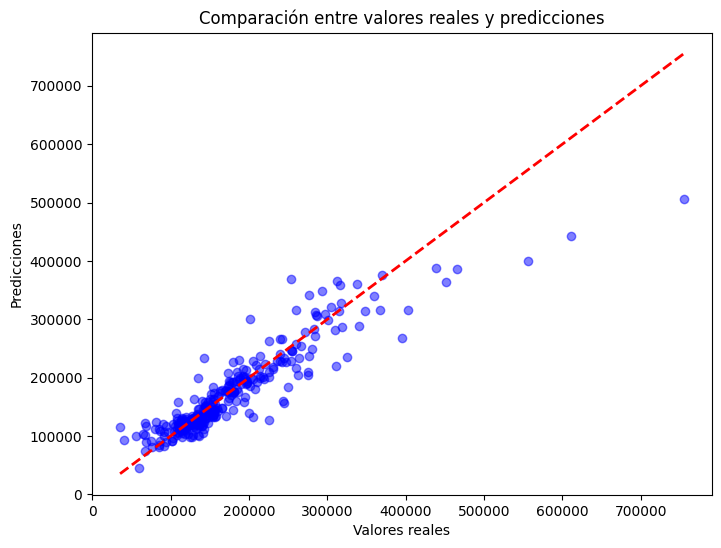

In [16]:
# Gráfico de Predicciones vs Valores Reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Línea diagonal
plt.title("Comparación entre valores reales y predicciones")
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.show()

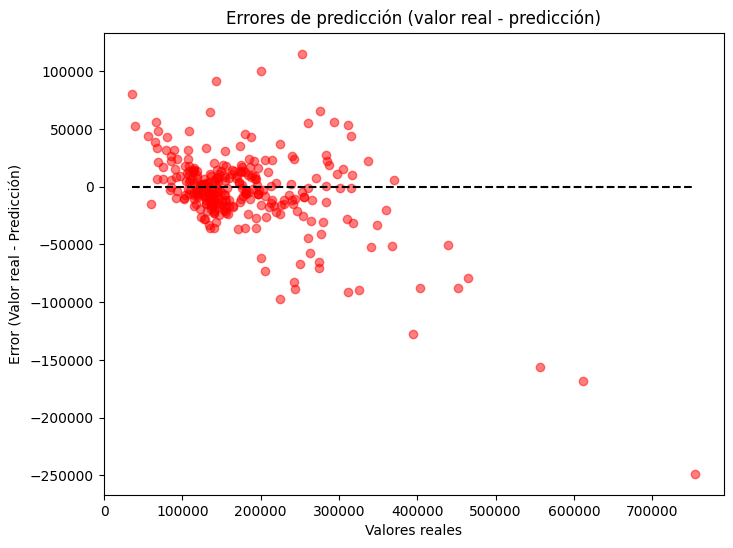

In [17]:
# Gráfico de Errores de Predicción
errores = y_pred - y_test
plt.figure(figsize=(8, 6))
plt.scatter(y_test, errores, color='red', alpha=0.5)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='black', linestyles='dashed')
plt.title("Errores de predicción (valor real - predicción)")
plt.xlabel("Valores reales")
plt.ylabel("Error (Valor real - Predicción)")
plt.show()

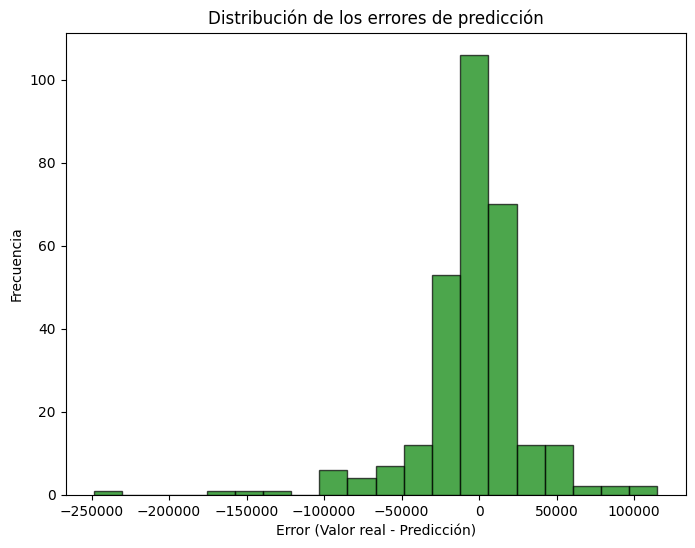

In [18]:
# Histograma de Errores de Predicción
plt.figure(figsize=(8, 6))
plt.hist(errores, bins=20, color='green', edgecolor='black', alpha=0.7)
plt.title("Distribución de los errores de predicción")
plt.xlabel("Error (Valor real - Predicción)")
plt.ylabel("Frecuencia")
plt.show()

**Poner la discusión y resultados aquí**

## Modelo de clasificación

In [43]:
mean_price = train['SalePrice'].mean()
std_price = train['SalePrice'].std()

low_price = mean_price - std_price
mid_price = mean_price + std_price

def categorizar_casas(precio):
    if precio <= low_price:
        return "Barata"
    elif precio <= mid_price:
        return "Normal"
    else:
        return "Cara"

train['Categoria'] = train['SalePrice'].apply(categorizar_casas)

train['Categoria'].value_counts()

Categoria
Normal    1145
Cara       191
Barata     124
Name: count, dtype: int64

Hacemos el pipeline con los datos normalizados

In [44]:
knn_clas_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('knn', KNeighborsClassifier(metric='euclidean', p=3))
])

param_grid = {
    'knn__n_neighbors': range(1, 41)
}

Probamos diferentes valores de k para encontrar el que tenga mayor precisión y menor coste computacional.

In [45]:
grid_search = GridSearchCV(knn_clas_pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mejor valor de K
best_k = grid_search.best_params_['knn__n_neighbors']
best_score = grid_search.best_score_

print(f"Mejor valor de K: {best_k}")
print(f"Mejor accuracy en validación cruzada: {best_score:.4f}")

C:\Users\dgv31\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Mejor valor de K: 38
Mejor accuracy en validación cruzada: 0.0205


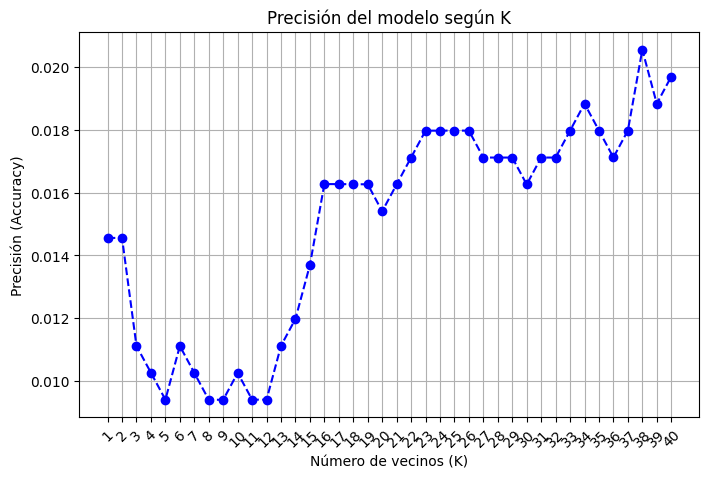

In [46]:
k_values = param_grid['knn__n_neighbors']
accuracies = grid_search.cv_results_['mean_test_score']  # Accuracy promedio por cada K

# Graficar la precisión en función de K
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='dashed', color='b')
plt.xlabel('Número de vecinos (K)')
plt.ylabel('Precisión (Accuracy)')
plt.title('Precisión del modelo según K')
plt.xticks(k_values, rotation=45)  # Para que los valores de K se vean bien
plt.grid(True)
plt.show()

El número de K ideal es muy alto y el accuracy es muy mala, lo que nos dice que el modelo no está funcionando bien y está sorteando las casas casi de manera aleatoria. Por lo tanto haremos algunos cambios.